## Assignment 1 
### Anubhav a1812913

#### All Imports

In [1]:
#import Libraries"
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #Importing Stop Words
#Tokenize the words
nltk.download('punkt')
from nltk.tokenize import word_tokenize #to TOkenize the words
# import lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from google.colab import drive
drive.mount('/content/drive')
import numpy as np


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Reading datasets

In [2]:
#Reading data
train_text = []
with open('drive/My Drive/NLP/Ass1/Data/reviews_train.txt', encoding='latin-1') as f:
    train_text = f.readlines()
# train_text

#reading data for testing 
test_text = []
with open('drive/My Drive/NLP/Ass1/Data/reviews_test.txt', encoding='latin-1') as f:
    test_text = f.readlines()
# test_text


#Split the sentences toextract the labels
token_words_train = [line.split() for line in train_text]
token_words_test = [line.split() for line in test_text]



#Seperating words into labels and training data
train_data = [i[1:-1] for i in token_words_train]
temp_train_labels = [i[0] for i in token_words_train]
train_labels = [word.replace('__label__1', 'negative').replace('__label__2', 'positive') for word in temp_train_labels]
test_data = [i[1:-1] for i in token_words_test]
temp_test_labels = [i[0] for i in token_words_test]
test_labels = [word.replace('__label__1', 'negative').replace('__label__2', 'positive') for word in temp_test_labels]
train_data = [" ".join(word) for word in train_data if word != '']
test_data = [" ".join(word) for word in test_data if word != '']

### 2. Pre-processing

In [3]:
import re
#Remove punctuation and all non-alphanumaric characters
rm_punct_train = [line.translate(line.maketrans('', '', string.punctuation)) for line in train_data]
rm_punct_test = [line.translate(line.maketrans('', '', string.punctuation)) for line in test_data]
# rm_punct_train = [[word for word in line if word.isalnum()] for line in rm_stp_train]
# rm_punct_test = [[word for word in line if word.isalnum()] for line in rm_stp_test]

# Tokenize the sentences
token_words_train = [word_tokenize(text) for text in rm_punct_train]
token_words_test = [word_tokenize(text) for text in rm_punct_test]

#Remove all non-alphanumaric characters
rm_nonalpha_train = [[re.sub(r'[^a-zA-Z0-9]','',i)for i in line ] for line in token_words_train]
rm_nonalpha_test = [[re.sub(r'[^a-zA-Z0-9]', '', i) for i in line] for line in token_words_test]

#Remove Stop words
stop_words = set(stopwords.words('english'))
rm_stp_train  = [[word for word in line if word.lower() not in stop_words]for line in rm_nonalpha_train]
rm_stp_test = [[word for word in line if word.lower() not in stop_words]for line in rm_nonalpha_test]


#Creating Version 1
train_version1 = rm_stp_train
test_version1 = rm_stp_test

#Performing lowercasing of words on version1 for Version 2
train_version2 = [[word.lower() for word in line]for line in train_version1]
test_version2 = [[word.lower() for word in line]for line in test_version1]

#Performing Lemmatization of words on version2 for Version 3

train_version3 = [[lemmatizer.lemmatize(word) for word in line]for line in train_version2]
test_version3 = [[lemmatizer.lemmatize(word) for word in line]for line in test_version2]

In [4]:
#Printing Shapes of both Versions
print(f"Shape of Version 1 Training : {len(train_version1)}\n")
print(f"Shape of Version 1 Testing : {len(test_version1)}\n")
print(f"Shape of Version 2 Training : {len(train_version2)}\n")
print(f"Shape of Version 2 Testing : {len(test_version2)}\n")
print(f"Shape of Version 3 Training : {len(train_version3)}\n")
print(f"Shape of Version 3 Testing : {len(test_version3)}\n")

Shape of Version 1 Training : 300000

Shape of Version 1 Testing : 100000

Shape of Version 2 Training : 300000

Shape of Version 2 Testing : 100000

Shape of Version 3 Training : 300000

Shape of Version 3 Testing : 100000



### 3. Dataset analysis

Perform basic dataset analysis: proportion of positive and negative sentiments, number of 
unique words in all three versions. Present the results in charts or tables. Discuss the results 
and how this may affect classification performance and the selection of performance 
metrics. 

Showing graphically the proportions of the labels in the Training dataset
AxesSubplot(0.125,0.125;0.775x0.755)
negative    150302
positive    149698
Name: Lables, dtype: int64


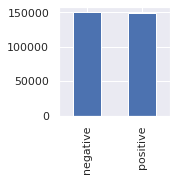

In [5]:
# Checking proportion of Positive to negative sentiment
import matplotlib.pyplot as plt 
import pandas as pd 
# Plot setup 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
# mpl.rc ( 'axes' , labelsize= 7 ) 
# mpl.rc ( 'xtick' , labelsize= 6 ) 
# mpl.rc ( 'ytick' , labelsize= 6 ) 
# mpl.rc ( 'figure' , dpi= 240 ) 
plt.close ( 'all' ) 

import seaborn as sns
import plotly.express as px 
train_label_df = pd.DataFrame ( train_labels , columns = [ 'Lables' ]) 
test_label_df = pd.DataFrame ( test_labels , columns = [ 'Lables' ]) 
sns. set () 
print ( "Showing graphically the proportions of the labels in the Training dataset" ) 
print ( train_label_df [ 'Lables' ] .value_counts () .plot ( kind= 'bar' , figsize= ( 2 , 2 ))) 
train_negative = train_label_df [ 'Lables' ] .value_counts ()[0]
train_positive = train_label_df [ 'Lables' ] .value_counts ()[1]
print ( train_label_df [ 'Lables' ] .value_counts ())

Showing graphically the proportions of the labels in the Testing dataset
AxesSubplot(0.125,0.125;0.775x0.755)
positive    50302
negative    49698
Name: Lables, dtype: int64


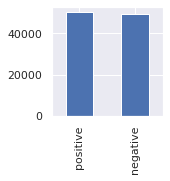

In [6]:
sns.set() 
print("Showing graphically the proportions of the labels in the Testing dataset") 
print(test_label_df['Lables'].value_counts().plot(kind='bar',figsize=(2,2))) 
print(test_label_df['Lables'].value_counts())
test_negative = test_label_df [ 'Lables' ] .value_counts ()[1]
test_positive = test_label_df [ 'Lables' ] .value_counts ()[0]

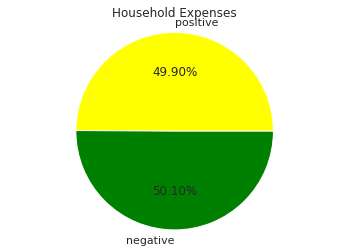

In [7]:
import matplotlib.pyplot as plt
labels= ['positive', 'negative']
colors=['yellow','green']
sizes= [train_positive,train_negative]
# plt.figure(figsize=(5,5))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Household Expenses')
plt.axis('equal')
plt.show()

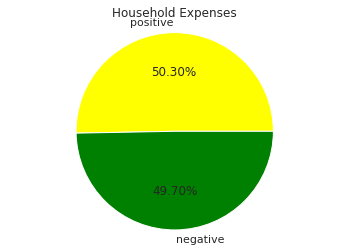

In [8]:
import matplotlib.pyplot as plt
labels= ['positive', 'negative']
colors=['yellow','green']
sizes= [test_positive,test_negative]
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Household Expenses')
plt.axis('equal')
plt.show()

In [9]:
def unique_dict(data):
  uniqe_version = {} 
  for line in data : 
    for j in line : 
      if j in uniqe_version.keys():
        uniqe_version [ j ] += 1
      else :
        uniqe_version [ j ] = 1
  return uniqe_version
#Finding out Unique words in Version 1 
uniqe_version1 = unique_dict(train_version1)
uniqe_version2 = unique_dict(train_version2)
uniqe_version3 = unique_dict(train_version3)
print ( f"Unique words in version1 of the Dataset : { len ( uniqe_version1 )} \n" ) 
print ( f"Unique words in version2 of the Dataset : { len ( uniqe_version2 )} \n" ) 
print ( f"Unique words in version3 of the Dataset : { len ( uniqe_version3 )} \n" )

Unique words in version1 of the Dataset : 481138 

Unique words in version2 of the Dataset : 395037 

Unique words in version3 of the Dataset : 380700 



In [10]:
# !pip install wordcloud 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
#Word Cloud for unique words in VERSION 1 
def disp_wordCloud(title,dict,max_words=1000):
  plt.figure(figsize=(5,6))
  wordcloud = WordCloud (background_color="black",max_words=1000).generate_from_frequencies (dict)
  plt.imshow ( wordcloud , interpolation= 'bilinear' ) 
  plt.axis ( "off" ) 
  plt.title ( f"Word Cloud for unique wors in {title}" ) 
  plt.imshow (wordcloud.recolor(colormap='Pastel2', random_state=17), alpha=0.98)



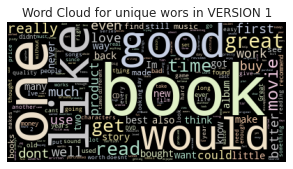

In [11]:
title = "VERSION 1"
disp_wordCloud(title,uniqe_version1,max_words=1000)

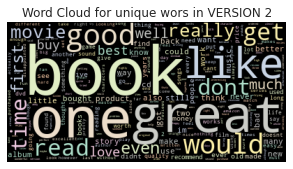

In [12]:
title = "VERSION 2"
disp_wordCloud(title,uniqe_version2,max_words=1000)

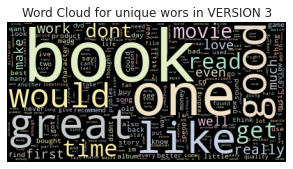

In [13]:
title = "VERSION 3"
disp_wordCloud(title,uniqe_version3,max_words=1000)

In [14]:
#Converting list of Tokenks into sentences
sen_train_version1 = [" ".join(word) for word in train_version1 if word != '']
sen_train_version2 = [" ".join(word) for word in train_version2 if word != ""]
sen_train_version3 = [" ".join(word) for word in train_version3 if word != ""]


sen_test_version1 = [" ".join(word) for word in test_version1 if word != ""]
sen_test_version2 = [" ".join(word) for word in test_version2 if word != ""]
sen_test_version3 = [" ".join(word) for word in test_version3 if word != ""]
sen_train_version1[0]

'Almost Completely Useless impossible keep Ethernet cord plugged device slides use tape zip ties Popsicle stick keep plugged Terrible'

### 4. Sentiment classification using Machine Learning

Use at least two machine learning methods of your choice to classify the three versions 
obtained in point 2 into positive or negative polarity. Show and compare test results of this 
experiment. Choose the best dataset version and model and show the test results on this 
model. Discuss the results in terms of under/overfit. 

In [15]:
# Load libraries
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

All_Ttrain_acc = []
All_Ttest_acc = []
All_Vtrain_acc = []
All_Vtest_acc = []

# def get_val_accuracies(train_data,label,model,vec=True):
#   if vec == True:
#     count = CountVectorizer()
#   else:
#     count = CountVectorizer(lowercase=False)
#   X_train_bag_of_words = count.fit_transform(train_data)
#   cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
#   scores = cross_validate(model, X_train_bag_of_words, label, cv=cv, scoring="accuracy")
#   return scores

# def get_train_accuracies(train_data,label,model,vec=True):
#   if vec == True:
#     count = CountVectorizer()
#   else:
#     count = CountVectorizer(lowercase=False)
#   X_train_bag_of_words = count.fit_transform(train_data)
#   cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
#   scores = cross_validate(model, X_train_bag_of_words, label, cv=cv, scoring="accuracy" , return_train_score=True)
#   return scores

def train_test_accuracies(model,x_train,y_train,x_test,y_test,v1 = False):
  if v1 == True:
    count = CountVectorizer(lowercase=False)
  else:
    count = CountVectorizer()
  # Transforming the datasets
  X_train_bag_of_words = count.fit_transform(x_train)
  X_test_bag_of_words = count.transform(x_test)
  # getting training anv validation scores
  cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

  #Using model to classify
  model.fit(X_train_bag_of_words, y_train)
  scores = cross_validate(model, X_train_bag_of_words, y_train, cv=cv, scoring="accuracy" , return_train_score=True)
  avg_val_acc = sum(scores['test_score'])/5
  avg_train_acc = sum(scores['train_score'])/5
  y_pred = model.predict(X_test_bag_of_words)
  test_acc = accuracy_score(y_test, y_pred)
  return (avg_train_acc,avg_val_acc,test_acc)

clf = BernoulliNB()
print("\nVersion 1:\n")
V1 = train_test_accuracies(clf,sen_train_version1,train_labels,sen_test_version1,test_labels,True)
print(f"Average  Validation Accuracy score : {V1[1]}")
print(f"Average  Training Accuracy score : {V1[0]}")
print(f"Testing Accuracy score : {V1[2]}")

print("\nVersion 2:\n")
V2 = train_test_accuracies(clf,sen_train_version2,train_labels,sen_test_version2,test_labels)
print(f"Average  Validation Accuracy score : {V2[1]}")
print(f"Average  Training Accuracy score : {V2[0]}")
print(f"Testing Accuracy score : {V2[2]}")

print("\nVersion 3:\n")
V3 = train_test_accuracies(clf,sen_train_version3,train_labels,sen_test_version3,test_labels)
print(f"Average  Validation Accuracy score : {V3[1]}")
print(f"Average  Training Accuracy score : {V3[0]}")
print(f"Testing Accuracy score : {V3[2]}")


Version 1:

Average  Validation Accuracy score : 0.85169
Average  Training Accuracy score : 0.9009316666666667
Testing Accuracy score : 0.85219

Version 2:

Average  Validation Accuracy score : 0.84634
Average  Training Accuracy score : 0.8895866666666666
Testing Accuracy score : 0.84618

Version 3:

Average  Validation Accuracy score : 0.84433
Average  Training Accuracy score : 0.8870758333333333
Testing Accuracy score : 0.84507


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', random_state=0)
print("\nVersion 1:\n")
V1 = train_test_accuracies(clf,sen_train_version1,train_labels,sen_test_version1,test_labels,True)
print(f"Average  Validation Accuracy score : {V1[1]}")
print(f"Average  Training Accuracy score : {V1[0]}")
print(f"Testing Accuracy score : {V1[2]}")

print("\nVersion 2:\n")
V2 = train_test_accuracies(clf,sen_train_version2,train_labels,sen_test_version2,test_labels)
print(f"Average  Validation Accuracy score : {V2[1]}")
print(f"Average  Training Accuracy score : {V2[0]}")
print(f"Testing Accuracy score : {V2[2]}")

print("\nVersion 3:\n")
V3 = train_test_accuracies(clf,sen_train_version3,train_labels,sen_test_version3,test_labels)
print(f"Average  Validation Accuracy score : {V3[1]}")
print(f"Average  Training Accuracy score : {V3[0]}")
print(f"Testing Accuracy score : {V3[2]}")


Version 1:



In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# parameters = {
#     'n_estimators': [5,50,100],
#     'max_depth': [2,10,20,None]
# }
# count = CountVectorizer(lowercase=False)
# X_train_bag_of_words = count.fit_transform(sen_train_version1)

# cv = GridSearchCV(rf,parameters)
# cv.fit(X_train_bag_of_words,train_labels)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# clf = RandomForestClassifier( max_depth = 20, n_estimators =100)
print("\nVersion 1:\n")
V1 = train_test_accuracies(clf,sen_train_version1,train_labels,sen_test_version1,test_labels,True)
print(f"Average  Validation Accuracy score : {V1[1]}")
print(f"Average  Training Accuracy score : {V1[0]}")
print(f"Testing Accuracy score : {V1[2]}")

print("\nVersion 2:\n")
V2 = train_test_accuracies(clf,sen_train_version2,train_labels,sen_test_version2,test_labels)
print(f"Average  Validation Accuracy score : {V2[1]}")
print(f"Average  Training Accuracy score : {V2[0]}")
print(f"Testing Accuracy score : {V2[2]}")

print("\nVersion 3:\n")
V3 = train_test_accuracies(clf,sen_train_version3,train_labels,sen_test_version3,test_labels)
print(f"Average  Validation Accuracy score : {V3[1]}")
print(f"Average  Training Accuracy score : {V3[0]}")
print(f"Testing Accuracy score : {V3[2]}")

### 5. Sentiment classification using VADER sentiment lexicon

Use VADER sentiment lexicon/utility to classify the test set reviews into the polarity. 
Compare results with those obtained in point 4. Discuss the differences.

In [ ]:
def VADER_analysis()

analyser = SentimentIntensityAnalyzer()
for text in text_data:
    score = analyser.polarity_scores(text)
    if score['compound'] >= 0.05:
        print(text+": "+"VADER positive")
    elif score['compound'] <= -0.05:
        print(text+": "+"VADER negative")
    else:
        print(text+": "+"VADER neutral")

### 6. (optional challenge 3 points) Combine VADER with the classifier

(optional challenge up to 10/100 points) Combine VADER sentiment analysis output with the 
classification model. Classify best_data and compare with results with point 4

### 7. References

In [ ]:
# # create count vectorizer and fit it with training data
# count = CountVectorizer()
# X_train_bag_of_words = count.fit_transform(sen_train_version1)

# # transform the test data into bag of words creaed with fit_transform
# X_test_bag_of_words = count.transform(sen_test_version1)

# scoring = ['precision_macro', 'recall_macro']
# clf = BernoulliNB()
# cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
#     # cross_validation = cross_validate(lr_model, train, train_target, cv=cv, scoring="accuracy", return_train_score=True)
#     # scores = cross_validate(clf, X_train_bag_of_words, train_labels, cv=cv, scoring=scoring)

# scores = cross_validate(clf, X_train_bag_of_words, train_labels, cv=cv, scoring="accuracy")
# print("\nVersion 1:\n")
# t_accv2 = get_train_accuracies(sen_train_version2,train_labels,clf,False)
# All_Vtrain_acc.append(sum(scores['test_score'])/5)
# print(f"Average  Validation Accuracy score : {sum(scores['test_score'])/5}")
# scores = cross_validate(clf, X_train_bag_of_words, train_labels, cv=cv, scoring="accuracy" , return_train_score=True)
# All_Ttrain_acc.append(sum(scores['train_score'])/5)
# print(f"Average  Training Accuracy score : {sum(scores['train_score'])/5}")